#### xgboost 설치

In [1]:
!pip install xgboost

In [74]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor

# 저장
import pickle




# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 16                  # 폰트 크기
plt.rcParams['figure.figsize'] = 20,10          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 
import warnings
warnings.filterwarnings('ignore')

# 머신러닝 프로젝트
1. 데이터 수집 : csv, xlsx, spss 일 경우에는 다운로드. 
                json, xml 이라면 bs4, feedparser, json 등등으로 수집.
                IoT를 활용, 설문조사 등등
                
2. 데이터 준비 : DataFrame 생성 (pandas)
3. 데이터 전처리(분석) : 이상치, 결측치, 극단치에 대한 처리
4. 데이터 분석 : 데이터의 패턴을 읽어 사람이 분석 (pandas, matplotlib, seaborn)
5. 데이터 전처리 (머신러닝) : 문자열 -> 숫자, 표준화 작업 등등
6. 학습 모델 선정 : 하이퍼 파라미터 튜닝, 교차 검증 등등
7. 전체 데이터를 학습
8. 파일로 저장
9. 예측결과 도출

### 2. 데이터 준비
- 파일 형태로 저장되어 있는 데이터를 읽어와 데이터 프레임을 생성한다.
- 데이터 프레임 생성이 성공했다면 데이터에 대한 구조적인 문제는 없다.

In [18]:
# 분류 데이터
df1 = pd.read_csv('dataset/breast_cancer.csv') 
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


### 데이터 전처리
- 숫자 -> 문자열 : ex) 성별과 같은 레이블형 데이터가 숫자로 되어 있을 경우 문자로 바꿔주는 작업
- 결측치 처리 : 측정되지 않은 데이터 (na으로 표시). 제거나 대체
- 이상치 처리 : 이상한 데이터, 제거나 대체
- 극단치 처리 : 정상 범위안에 있지만 다른 데이터와 너무 동떨어져 있는 데이터, 확인후 처리


##### 결측치 확인

In [20]:
df1.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

##### 이상치 확인 
- 범위형 (요약 통계정보를 통해 최대 최소 값을 확인)

In [25]:
df1[['mean radius','mean texture','mean perimeter']].describe()
# df1.drop('target',axis=1).describe()


,mean radius,mean texture,mean perimeter
count,454.000000,454.000000,454.000000
mean,14.238905,18.993546,92.730242
std,3.504169,4.086344,24.141851
min,6.981000,9.710000,43.790000
25%,11.770000,16.020000,75.472500
50%,13.470000,18.680000,87.090000
75%,16.130000,21.555000,106.525000
max,28.110000,39.280000,188.500000


##### 이상치 확인 
- 레이블형

In [27]:
df1['target'].value_counts()

benign       268
malignant    186
Name: target, dtype: int64

##### 범위형 데이터들에 대해 극단치를 확인한다.

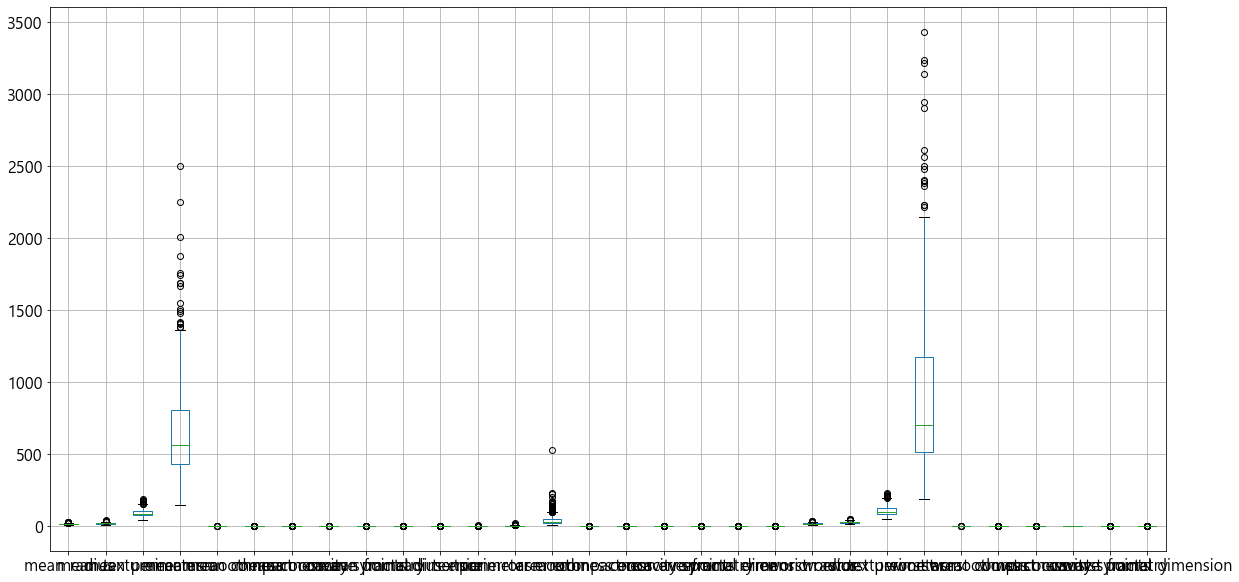

In [28]:
df1.drop('target', axis=1).boxplot()
plt.show()

### 머신러닝을 위한 데이터 전처리
- 문자열 -> 숫자
- 표준화 작업 : 모든 컬럼의 데이터에 대한 표준편차를 비숫한 수준으로 맞추는 작업

In [30]:
# 입력과 결과로 나눈다.
x = df1.drop('target', axis=1)
y = df1['target']

In [33]:
# 문자열을 숫자로 변환
encoder1 = LabelEncoder()
encoder1.fit(y)
y=encoder1.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [34]:
# 표준화 작업
scaler1 = StandardScaler()
scaler1.fit(x)
x = scaler1.transform(x)
x

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

### 학습 모델 선정

#### KNN
- 최근접 이웃
- 학습 과정이 데이터를 저장하는 것으로 끝난다.
- 주변의 데이터를 확인하여 결과를 예측한다.
- 속도가 빠르지만 주변만 바라보기 때문에 다른 모델에 비해서 성능이 떨어질 수도 있다.
- 이웃의 개수가 너무 많으면 편향의 오류가 발생할 가능성이 높다.
- 하이퍼 파라미터 튜닝 : 성능을 향상시키는 것도 있지만 편향의 오류를 예방하는 효과도 있다.
- 성능은 어느정도 타협을 볼 수 있고 속도가 중요한 경우 사용

In [36]:
# KFold 생성 : 교차 검증을 위해 데이터 구성을 하는 작업
fold1 = StratifiedKFold(n_splits=10)

In [39]:
# KNN

params ={
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

model1 = KNeighborsClassifier()
grid1 = GridSearchCV(model1, param_grid=params, scoring='accuracy', cv=fold1)
grid1.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}')


최적의 하이퍼 파라미터 : {'n_neighbors': 9}
최적의 모델 평균 성능 : 0.9670531400966184


### 선형 모델
- 선형 회귀 기법을 이용해 데이터간의 경계선을 찾는 방식
- LogisticRegression : 경계선과 가장 가까운 데이터와의 거리가 먼 선을 찾는다.
- SVM : 경계선과 가장 가까운 데이터와의 거리가 가까운 선을 찾는다.
- 적당한 속도와 적당한 성능을 보인다.
- 하이퍼 파라미터 튜닝 : 규제 강도를 튜닝한다. (규제가 약해지면 편향의 오류, 규제가 강해지면 과적합 발생할수 있다.)

In [41]:
# LogisticRegression

params={
    # 값이 크면 규제가 약해지고, 값이 작으면 규제가 강해진다.
    'C' :[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
}

model2 = LogisticRegression()
grid2 = GridSearchCV(model2, param_grid=params, scoring='accuracy', cv=fold1)
grid2.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid2.best_score_}')

최적의 하이퍼 파라미터 : {'C': 0.1}
최적의 모델 평균 성능 : 0.9779227053140097


In [45]:
# SVM

params={
    # 값이 크면 규제가 약해지고, 값이 작으면 규제가 강해진다.
    'C' :[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
}

model3 = SVC()
grid3 = GridSearchCV(model3, param_grid=params, scoring='accuracy', cv=fold1)
grid3.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid3.best_score_}')

최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.9648792270531402


### 결정트리
- 데이터를 보고 질문을 생성하여 학습하는 알고리즘
- 학습과정에서 질문을 생성하기 때문에 학습 시간이 오래걸림
- 예측 과정에서 질문을 통과해야 하기 때문에 예측 시간이 오래 걸린다.
- 앞서 살펴본 모델에 비해 성능이 높게 나타날 가능성이 높다.
- 단 결정트리를 학습 데이터에 최적화(과적합)되는 모델이므로 사용에 주의해야한다.
- 하이퍼 파라미터 튜닝 : 질문이 무한정 생성되어 학습과 예측이 오래 걸리는 것을 예방한다.

In [46]:
# 결정트리

params={
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model4 = DecisionTreeClassifier()
grid4 = GridSearchCV(model4, param_grid=params, scoring='accuracy', cv=fold1)
grid4.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid4.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 7}
최적의 모델 평균 성능 : 0.936183574879227


### 앙상블
- 하나의 모델이 아닌 다수의 모델을 사용하여 학습하고 예측하는 알고리즘
- 과적합된 알고리즘을 모아 각 알고리즘이 던지는 예측 결과들을 취합하여 최종결과를 예측하는 알고리즘
- 랜덤 포레스트 :  다수의 트리를 모아 학습하고 예측하는 알고리즘
- 부스팅 : 랜덤 포레스트 기법과 비슷하다. 한번의 학습과 예측이 아닌 어긋나게 예측한 결과에 대해 보정작업을 해서 랜덤 포레스트보다 정확도가 높게 나타날 확률이 있는 알고리즘
- 다른 모델에 비해 성능이 높을 확률이 높지만 속도는 매우 오래 걸린다.
- 하이퍼 파라미터 튜닝 : 성능 향상, 속도 조절

In [48]:
# 랜덤 포레스트

params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model5 = RandomForestClassifier()
grid5 = GridSearchCV(model5, param_grid=params, scoring='accuracy', cv=fold1)
grid5.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid5.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 9, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.9649275362318841


In [49]:
# 부스팅 

params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model6 = GradientBoostingClassifier()
grid6 = GridSearchCV(model6, param_grid=params, scoring='accuracy', cv=fold1)
grid6.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid6.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 1, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.9626086956521739


In [52]:
# 부스팅 

params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model7 = XGBClassifier(silent=True, verbosity=0, tree_method='gpu_hist') # gpu 사용하여 정확도를 끌어올릴수 있음
grid7 = GridSearchCV(model7, param_grid=params, scoring='accuracy', cv=fold1)
grid7.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid7.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 1, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.9626086956521739


In [53]:
# 각 모델의 최적의 하이퍼 파라미터가 설정된 모델을 추출한다.

best1=grid1.best_estimator_
best2=grid2.best_estimator_
best3=grid3.best_estimator_
best4=grid4.best_estimator_
best5=grid5.best_estimator_
best6=grid6.best_estimator_
best7=grid7.best_estimator_

In [58]:
print(best1)
print('-'*60)
print(best2)
print('-'*60)
print(best3)
print('-'*60)
print(best4)
print('-'*60)
print(best5)
print('-'*60)
print(best6)
print('-'*60)
print(best7)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
------------------------------------------------------------
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
------------------------------------------------------------
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,

### 교차 검증

In [63]:
r1 = cross_val_score(best1, x,y, scoring='accuracy', cv=fold1)
r2 = cross_val_score(best2, x,y, scoring='accuracy', cv=fold1)
r3 = cross_val_score(best3, x,y, scoring='accuracy', cv=fold1)
r4 = cross_val_score(best4, x,y, scoring='accuracy', cv=fold1)
r5 = cross_val_score(best5, x,y, scoring='accuracy', cv=fold1)
r6 = cross_val_score(best6, x,y, scoring='accuracy', cv=fold1)
r7 = cross_val_score(best7, x,y, scoring='accuracy', cv=fold1)

print('KNN:',r1.mean())
print(r2.mean())
print(r3.mean())
print(r4.mean())
print(r5.mean())
print(r6.mean())
print(r7.mean())


KNN: 0.9670531400966184
0.9779227053140097
0.9648792270531402
0.9296135265700484
0.9516425120772947
0.9626086956521739
0.9626086956521739


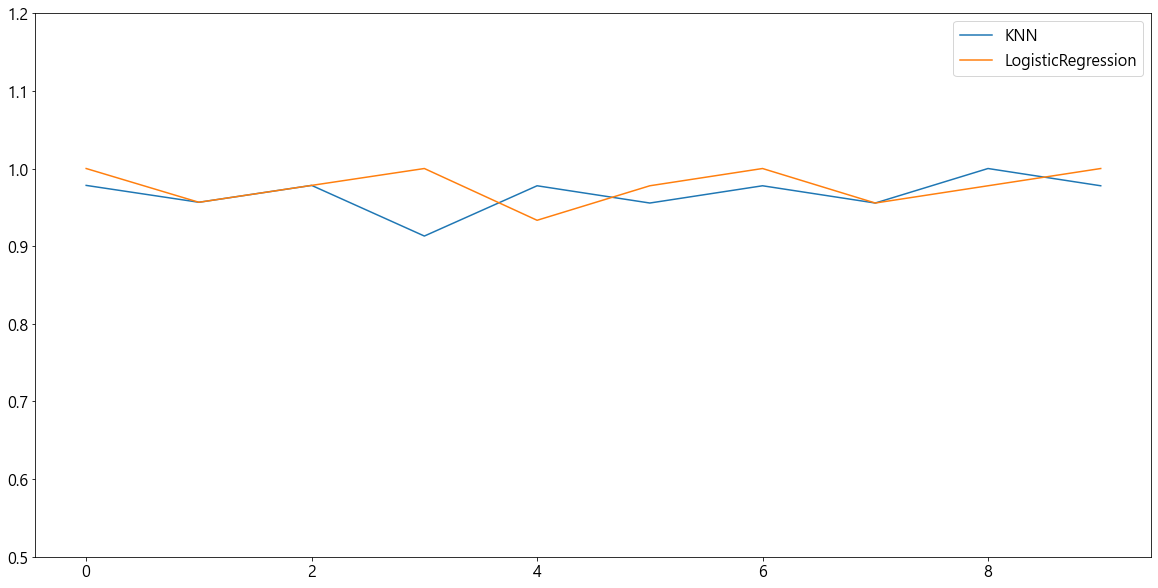

In [69]:
# 그래프를 보고 편차가 심하지 않은것을 찾음 
# x축은 교차 검증 번호

plt.plot(r1, label='KNN')
plt.plot(r2, label='LogisticRegression')
# plt.plot(r3, label='SVC')
# plt.plot(r4, label='DecisionTree')
# plt.plot(r5, label='RandomForest')
# plt.plot(r6, label='GradianBoosting')
# plt.plot(r7, label='XGBoost')

plt.legend()
plt.ylim(0.5,1.2)
plt.show()

### 전체 데이터 학습

In [70]:
best2.fit(x,y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
# 학습한 데이터를 통해 평가를 실시한다.
pred1 = best2.predict(x)

In [76]:
result1 = accuracy_score(y,pred1)
result1

0.9845814977973568

### 학습이 완료된 모델을 저장한다.

In [77]:
with open('model1.dat','wb') as fp:
    pickle.dump(encoder1,fp)
    pickle.dump(scaler1, fp)
    pickle.dump(best2,fp)
print('저장완료')

저장완료


### 예측 결과 추출

In [78]:
df2 = pd.read_csv('dataset/breast_cancer_new.csv')
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.34,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.12,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291


In [80]:
# 알고리즘 복원
with open('model1.dat','rb') as fp:
    new_encoder1 = pickle.load(fp)
    new_scaler1  = pickle.load(fp)
    new_model1   = pickle.load(fp)
    
print(new_encoder1)
print(new_scaler1)
print(new_model1)

LabelEncoder()
StandardScaler(copy=True, with_mean=True, with_std=True)
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [81]:
y2 = new_scaler1.transform(df2)
y2

array([[-0.46250369, -0.45164581, -0.50218195, ..., -0.28043066,
         0.5116929 , -0.5831113 ],
       [-0.24537993,  2.87283471, -0.26498762, ..., -0.59279929,
        -1.15425761, -0.39577673],
       [-0.74533596,  2.52250257, -0.7406203 , ..., -0.7316298 ,
        -0.08705654, -0.64284116],
       ...,
       [ 0.67453917,  2.22606768,  0.64563954, ...,  0.3671957 ,
        -1.12013199, -0.31704191],
       [ 1.81729582,  2.53230207,  1.96430728, ...,  2.21029035,
         1.77899418,  2.16989242],
       [-1.85095302,  1.3588119 , -1.85817047, ..., -1.75415837,
        -0.10722167, -0.74112394]])

In [82]:
pred2 = new_model1.predict(y2)
pred2

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0])

In [84]:
# 0과 1이 나올 예측값을 데이터 프레임으로 만들기

a1 = new_model1.predict_proba(y2)
proba_df = pd.DataFrame(a1, columns=['0','1'])
proba_df['target'] = pred2
proba_df

,0,1,target
0,9.695840e-01,0.030416,0
1,4.769654e-01,0.523035,1
2,6.499798e-01,0.350020,0
3,8.501220e-01,0.149878,0
4,9.097042e-01,0.090296,0
...,...,...,...
110,1.519423e-05,0.999985,1
111,2.894264e-04,0.999711,1
112,4.681448e-02,0.953186,1
113,5.824667e-07,0.999999,1


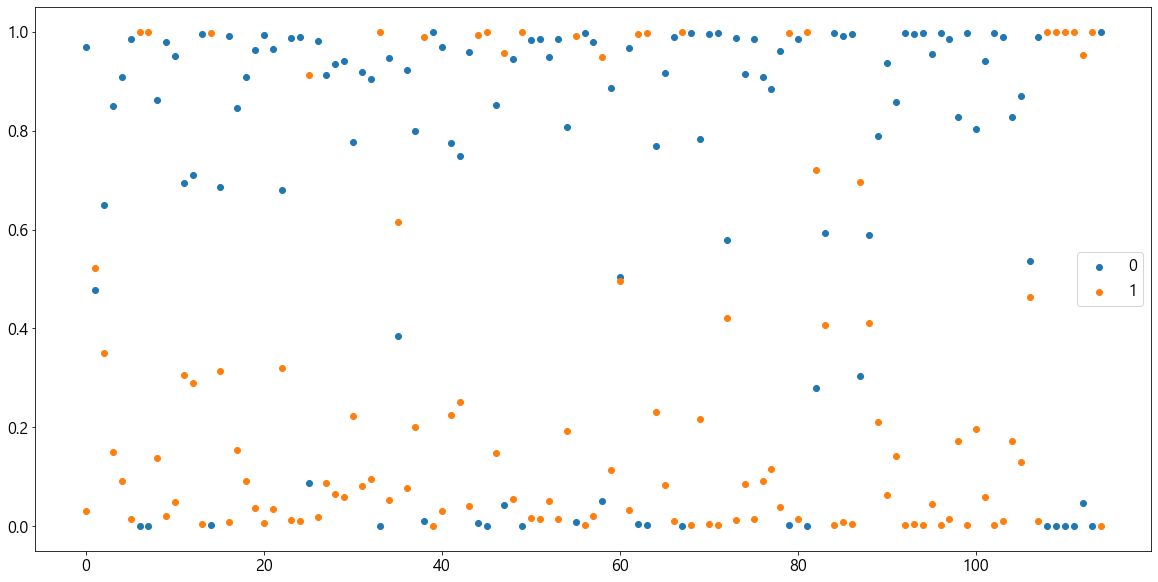

In [86]:
# 0부터 시작해서 전체 데이터의 개수가 들어있는 리스트를 생성한다.
a100 = list(range(len(proba_df['0'])))

# 중간에 위치한 값들이 많이 있다면 신뢰도가 낮다
plt.scatter(a100, proba_df['0'], label='0')
plt.scatter(a100, proba_df['1'], label='1')

plt.legend()
plt.show()

In [87]:
# 결과 데이터 복원 (숫자로 나왔던 데이터를 문자로 복원)
result100 = new_encoder1.inverse_transform(pred2)
result100

array(['benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'beni

### 결과 저장

In [88]:
df2['target'] = result100
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330,benign
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,malignant
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220,benign
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788,benign
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,benign


In [89]:
# 저장한다.
df2.to_csv('dataset/breast_cancer_result.csv')